<a href="https://colab.research.google.com/github/Jack-Cruz/Procesamiento_imagen/blob/main/clase_01_frecuencia_colores.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Importamos las librerías

In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
cv2.__version__

'4.1.2'

[155 204 250]
[250 204 155]


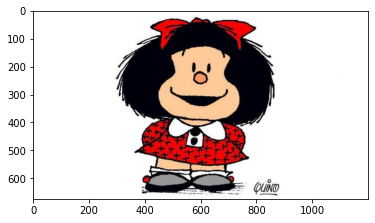

In [ ]:
im = cv2.imread("mafalda.jpg")

print(im[300, 600])

im = im[:,:,::-1]
print(im[300, 600])

plt.imshow(im)

Ancho, alto y canal

In [ ]:
im.shape

(674, 1200, 3)

Posicion

In [ ]:
im[0][0]

array([149, 149, 149], dtype=uint8)

#¿Cómo transformar de RGB a Blanco y Negro (Escala de Grises)?

Una forma es coger cada elemente y dividirlo entre tres

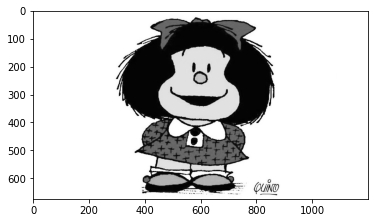

In [ ]:
grayim1 = (aux[:,:,0] / 255.0  + aux[:,:,1] / 255.0 + aux[:,:,2] / 255.0) / 3 
plt.imshow(grayim1, cmap="Greys_r")

Otra forma es usando la fórmula

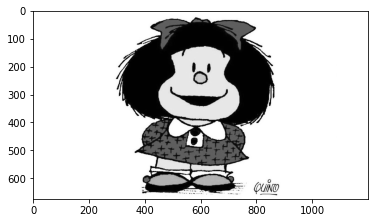

In [ ]:
grayim2 = 0.2989 * im[:,:,0] + 0.589 * im[:,:,1] + 0.114 * im[:,:,2]
plt.imshow(grayim2, cmap="Greys_r")

Comparamos las imágenes

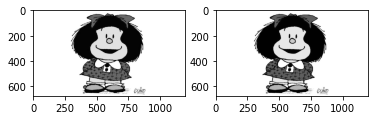

In [ ]:
#Virilis: esquema de color por defecto

plt.subplot(1, 2, 1)
plt.imshow(grayim1, cmap = "Greys_r")
plt.subplot(1, 2, 2)
plt.imshow(grayim2, cmap = "Greys_r")

#Definimos una función

In [ ]:
def rgb2grey1(img):
  red = img[:,:,0]
  green = img[:,:,1]
  blue = img[:,:,2]

  return np.floor((red + green + blue) / 3)

def rgb2grey2(img):
  red = img[:,:,0] / 255.0
  green = img[:,:,1] / 255.0
  blue = img[:,:,2] / 255.0

  return np.floor(((red + green + blue) / 3) * 255)

def rgb2grey3(img):
  return np.floor(0.299 * img[:,:,0] + 0.587 * img[:,:,1] + 0.114 * img[:,:,2]) 


In [ ]:
def imprimir(im):
  im1 = rgb2grey1(im)
  im2 = rgb2grey2(im)
  im3 = rgb2grey3(im)
  
  print(im1[:3, :3])
  print(im2[:3, :3])
  print(im3[:3, :3])

  plt.subplot(1, 4, 1)
  plt.imshow(im)

  plt.subplot(1, 4, 2)
  plt.imshow(im1, cmap="Greys_r")
  
  plt.subplot(1, 4, 3)
  plt.imshow(im2, cmap="Greys_r")

  plt.subplot(1, 4, 4)
  plt.imshow(im3, cmap="Greys_r")

[[63. 28. 29.]
 [27. 77. 79.]
 [32. 84. 84.]]
[[149. 199. 200.]
 [198. 248. 250.]
 [203. 255. 255.]]
[[148. 199. 200.]
 [198. 248. 250.]
 [202. 255. 255.]]


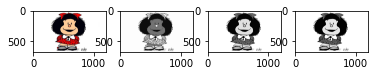

In [ ]:
# Prueba con mafalda

mafalda = cv2.imread("mafalda.jpg")
mafalda = mafalda[:,:,::-1]
imprimir(mafalda)

[[34. 34. 33.]
 [33. 33. 33.]
 [32. 32. 32.]]
[[34. 34. 33.]
 [33. 33. 33.]
 [32. 32. 32.]]
[[39. 39. 38.]
 [38. 38. 38.]
 [37. 37. 37.]]


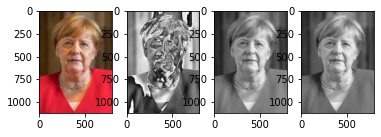

In [ ]:
# Prueba con merkel

merkel = cv2.imread("merkel.jpg")

merkel = merkel[:,:,::-1]
imprimir(merkel)

# Definimos un histograma

In [ ]:
def hist(grayimg):
  h = np.zeros((256))
  H, W = grayimg.shape
  
  for i in range(H):
    for j in range(W):
      h[ int(grayimg[i, j]) ] += 1
    
  return h

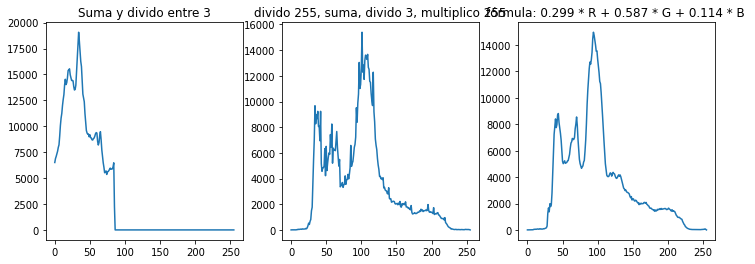

In [ ]:
# Histograma de merkel
mafalda = merkel

gray1 = rgb2grey1(mafalda)
h1 = hist(gray1)

gray2 = rgb2grey2(mafalda)
h2 = hist(gray2)

gray3 = rgb2grey3(mafalda)
h3 = hist(gray3)


fig, axes = plt.subplots(1, 3, figsize=(12, 4))

axes[0].plot(h1)
axes[0].set_title("Suma y divido entre 3")

axes[1].plot(h2)
axes[1].set_title("divido 255, suma, divido 3, multiplico 255")

axes[2].plot(h3)
axes[2].set_title("fórmula: 0.299 * R + 0.587 * G + 0.114 * B ");

Imprimir según R, G, B.

Text(0.5, 1.0, 'RGB')

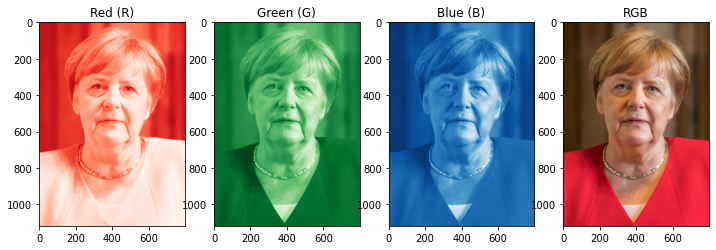

In [ ]:
fig, axes = plt.subplots(1, 4, figsize=(12, 4))
im = merkel

axes[0].imshow(im[:,:,0], cmap="Reds_r")
axes[0].set_title("Red (R)")

axes[1].imshow(im[:,:,1], cmap="Greens_r")
axes[1].set_title("Green (G)")

axes[2].imshow(im[:,:,2], cmap="Blues_r")
axes[2].set_title("Blue (B)")

axes[3].imshow(im)
axes[3].set_title("RGB")